Importing libraries

In [4]:
import math as m
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Exotic options pricer with Monte-Carlo simulations

The principle of the Monte Carlo simulation for estimating the price of an exotic option relies on using probabilistic methods to model the evolution of the underlying asset's prices and compute the average value of the option's payoffs across a large number of possible scenarios.


Assumption: The price of the underlying asset follows a stochastic process (geometric Brownian motion).

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

The discretized form for numerical simulation obtained using the Euler-Maruyama approximation is:

$$
S_{t+\Delta t} = S_t \exp \left( \left( r - q - \frac{\sigma^2}{2} \right) \Delta t + \sigma \sqrt{\Delta t} Z_t \right)
$$

with $Z_t \sim N(0,1)$ is a standard normal random variable

In [5]:

# Initial parameters :
S0 = 100         # initial price of the underlying asset
r = 0.05         # risk-free interest rate
vol = 0.5        # volatility
T = 1.0          # time to maturity
N = 1000         # number of simulations
n = 252          # number of time steps
K=110            # strike price
q = 0.02             # dividend yield 
dt = T/n         # time step size

Steps:
1. Simulate multiple price paths
2. Calculate the payoff for each path
3. Discount the payoff to present value (PV)
4. Average the payoff

### Simulate multiple price paths

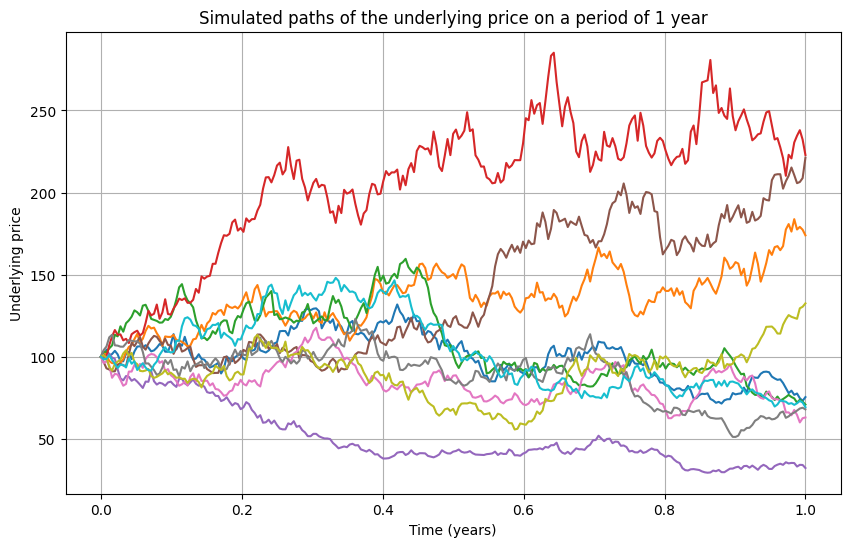

In [8]:
# Create the matrix S : each line is a trajectory (N trajectories)
S = np.zeros((N,n+1))
S[:,0]= S0  # initialize the N trajectories 

for t in range (1,n+1):
    Z = np.random.normal(0,1,N)
    S[:,t]=S[:,t-1]*np.exp((r-q-vol**2*0.5)*dt+vol*np.sqrt(dt)*Z)

# Time table
tabT= np.linspace(0,T,n+1)

# Visualization of 10 trajectories

plt.figure(figsize=(10, 6))

for i in range(10):  
    plt.plot(tabT, S[i]) #plot 10 random paths)
plt.title("Simulated paths of the underlying price on a period of 1 year")
plt.xlabel("Time (years)")
plt.ylabel("Underlying price")
plt.grid(True)
plt.show()

### Asian Call Option 

Asian option call:   $  \text{Payoff} = \max \left( 0, \frac{1}{M} \sum_{i=1}^M S_{t_i} - K \right)$


In [14]:
# Calculating the average S for each path
average_price = np.mean(S[:, 1:], axis=1) 

# Asian option Payoff for each path
payoffAsian = np.maximum(average_price - K, 0)

# Discount Payoff to PV
payoffAsianPV = payoffAsian*np.exp(-r*T)

#Average te Payoff
estimatedPriceAsian=np.mean(payoffAsianPV)

print(f"Estimated price of Asian call by Monte-Carlo simulation : {estimatedPriceAsian:.2f}")



Estimated price of Asian call by Monte-Carlo simulation : 7.87


### Lookback Call Option

Lookback call option:  $   \text{Payoff} = \max \left( 0, S_{\text{max}} - K \right)$


In [15]:
# Calculating the Smax for each path
Smax = np.max(S[:,1:], axis=1)

# Lookback call option Payoff for each path
payoffLb = np.maximum(Smax - K, 0)

# Discount Payoff to PV
payoffLbPV = payoffLb*np.exp(-r*T)

#Average te Payoff
estimatedPriceLb=np.mean(payoffLbPV)

print(f"Estimated price of Lookback call by Monte-Carlo simulation : {estimatedPriceLb:.2f}")




Estimated price of Lookback call by Monte-Carlo simulation : 34.61
